In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


Auto Encoder

아주 간단하면서 강력한 비지도 학습 딥러닝 모델로 입력값을 압축시킨 후, 다시 압축된 정보를 복원해서 입력값과 동일한 출력값을 가지도록 리턴하는 학습 모델이다.  
학습 과정을 통해 최대한 입력값과 출력값이 일치하도록 모델의 파라미터가 최적화 되고 오토 인코더의 압축된 정보는 입력값에서 노이즈가 제거된 핵심 특징들로 구성 저차원 데이터로 간주되어 차원 축소 목적으로 오토 인코더가 많이 사용된다.

<img src="./autoencoder.png" align="left" width="1000"/>

오토 인코더는 크게 인코더와 디코더로 구분되어 있고, 인코더와 디코더 사이에 압축된 정보가 존재한다.  
인코더와 디코더는 덴즈 레이어로 구성되어 있고, 인코더와 디코더 사이에는 입력되는 원본값 보다 작은 차원을 가지는 덴즈 레이어를 두어 정보를 합축한다.

MNIST 손글씨 데이터를 오토 인코더를 사용해서 차원 축소 후 시각화 한다.

MNIST 손글씨 데이터를 획득한다.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


데이터 전처리

획득된 학습 데이터는 오토 인코더 학습에 사용하고 테스트 데이터 중에서 500개의 데이터만 선택해서 시각화에 사용한다.

In [3]:
x_train = x_train.reshape(60000, 784) # 학습 데이터

# 테스트 데이터 중에서 500개의 데이터만 선택한다.
x_test = x_test[:500]
x_test = x_test.reshape(500, 784) # 테스트 데이터 => 시각화에 사용한다.
y_test = y_test[:500]

# 데이터 정규화
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

오토 인코더 모델을 만든다.

In [4]:
input_ = tf.placeholder(dtype=tf.float32, shape=[None, 784]) # 오터 인코더의 입력으로 사용할 placeholder
encoder = tf.layers.dense(input_, 128, tf.nn.tanh) # 인코더
bottlenect = tf.layers.dense(encoder, 3) # 3차원으로 차원 축소, 압축
decoder = tf.layers.dense(bottlenect, 128, tf.nn.tanh) # 디코더
output_ = tf.layers.dense(decoder, 784, tf.nn.sigmoid) # 출력

손실 함수와 Adam 옵티마이저

In [5]:
loss = tf.losses.mean_squared_error(labels=input_, predictions=output_) # 손실 함수
train = tf.train.AdamOptimizer(0.002).minimize(loss) # 최적화

학습 시킨다.

In [6]:
tf.set_random_seed(35)
batch_size = 5000
iteration = len(x_train) // batch_size

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 학습 시작
    for epoch in range(50):
        avg_loss = 0.0
        start = 0
        end = batch_size
        # 미니 배치 시작
        for i in range(iteration):
            _, loss_ = sess.run([train, loss], feed_dict={input_: x_train[start:end]})
            start += batch_size
            end += batch_size
            avg_loss += loss_ / iteration
        # ===== for i => 미니 배치 종료
        print('epoch: {:2d}, loss: {:6.4f}'.format(epoch + 1, avg_loss))
    # ==== for epoch => 학습 종료
    
    # 학습이 완료되면 오토 인코더를 사용해서 테스트 데이터가 3차원으로 압축된 벡터를 시각화를 위해 저장한다.
    bottlenect_ = sess.run(bottlenect, feed_dict={input_: x_test})

epoch:  1, loss: 0.1611
epoch:  2, loss: 0.0709
epoch:  3, loss: 0.0673
epoch:  4, loss: 0.0656
epoch:  5, loss: 0.0635
epoch:  6, loss: 0.0619
epoch:  7, loss: 0.0607
epoch:  8, loss: 0.0592
epoch:  9, loss: 0.0578
epoch: 10, loss: 0.0568
epoch: 11, loss: 0.0561
epoch: 12, loss: 0.0555
epoch: 13, loss: 0.0549
epoch: 14, loss: 0.0545
epoch: 15, loss: 0.0540
epoch: 16, loss: 0.0535
epoch: 17, loss: 0.0531
epoch: 18, loss: 0.0527
epoch: 19, loss: 0.0524
epoch: 20, loss: 0.0521
epoch: 21, loss: 0.0517
epoch: 22, loss: 0.0515
epoch: 23, loss: 0.0512
epoch: 24, loss: 0.0509
epoch: 25, loss: 0.0506
epoch: 26, loss: 0.0503
epoch: 27, loss: 0.0500
epoch: 28, loss: 0.0497
epoch: 29, loss: 0.0494
epoch: 30, loss: 0.0491
epoch: 31, loss: 0.0489
epoch: 32, loss: 0.0486
epoch: 33, loss: 0.0484
epoch: 34, loss: 0.0481
epoch: 35, loss: 0.0479
epoch: 36, loss: 0.0477
epoch: 37, loss: 0.0475
epoch: 38, loss: 0.0473
epoch: 39, loss: 0.0472
epoch: 40, loss: 0.0470
epoch: 41, loss: 0.0468
epoch: 42, loss:

In [7]:
print(len(bottlenect_))
print(type(bottlenect_))
print(bottlenect_)

500
<class 'numpy.ndarray'>
[[-10.867387    4.8557734 -19.295137 ]
 [ -9.800717    4.826832    8.959835 ]
 [-16.505346   -2.107151   -0.9881678]
 ...
 [-18.241041   10.962507   -9.715235 ]
 [-14.023962   19.092342   -2.2231305]
 [-13.118196   14.032696   -3.3665047]]


압축된 데이터를 시각화 한다.

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

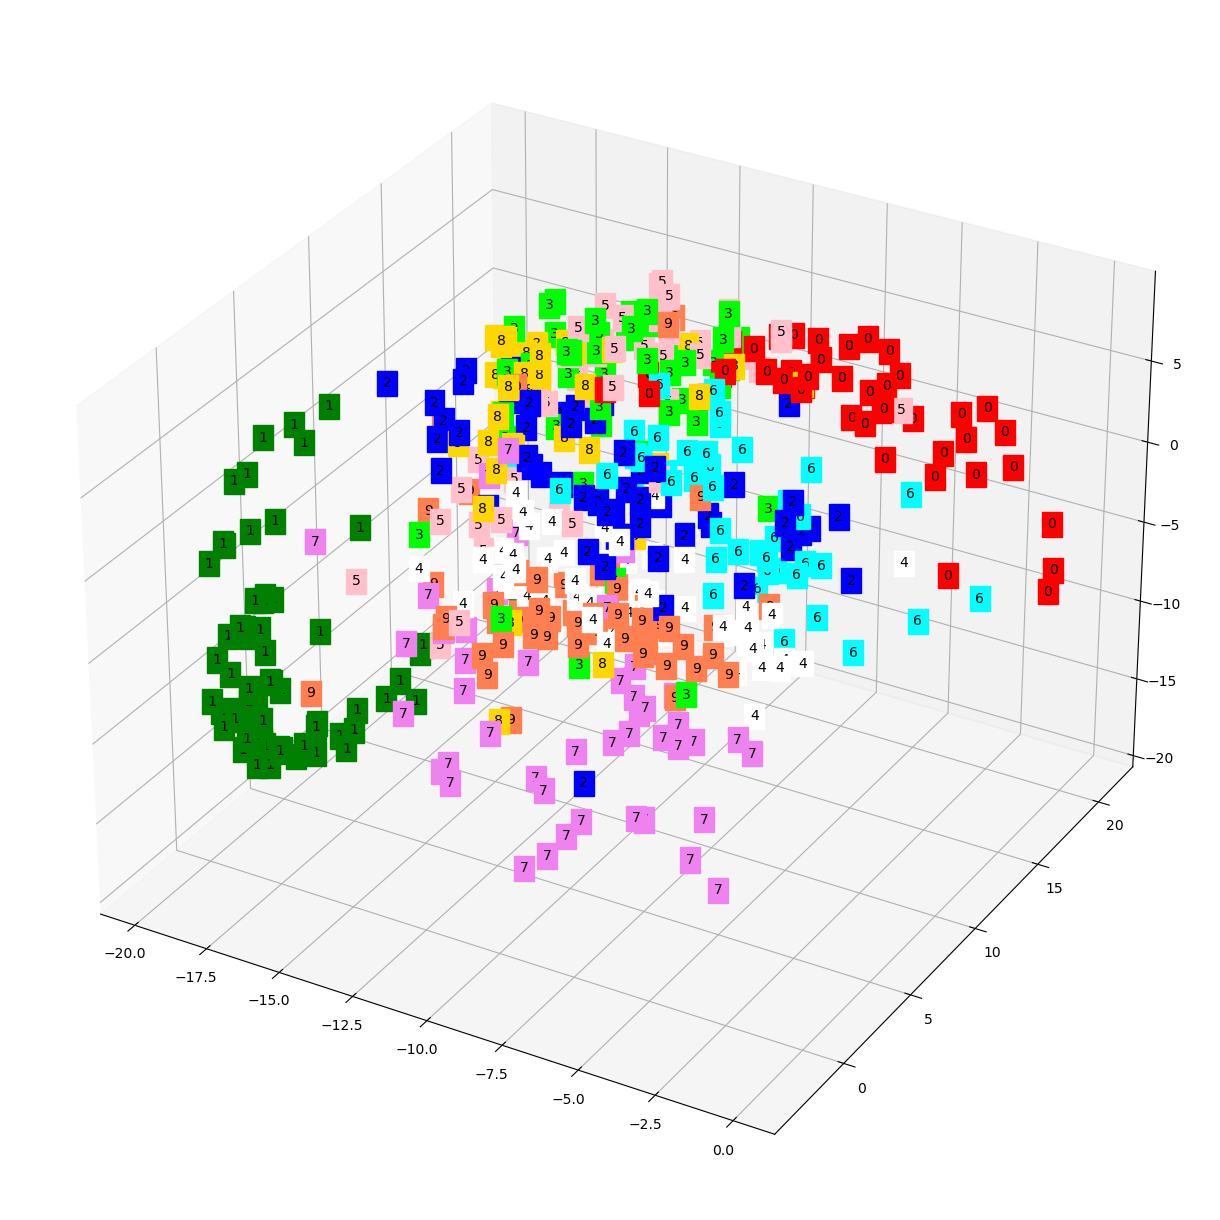

In [9]:
plt.figure(figsize=(16, 12))
fig = plt.figure(1)
ax = Axes3D(fig)

xs = bottlenect_[:, 0]
ys = bottlenect_[:, 1]
zs = bottlenect_[:, 2]

color = ['red', 'green', 'blue', 'lime', 'white', 'pink', 'aqua', 'violet', 'gold', 'coral']
for x, y, z, label in zip(xs, ys, zs, y_test):
    # print(x, y, z, label)
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)

ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())
plt.show()